<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

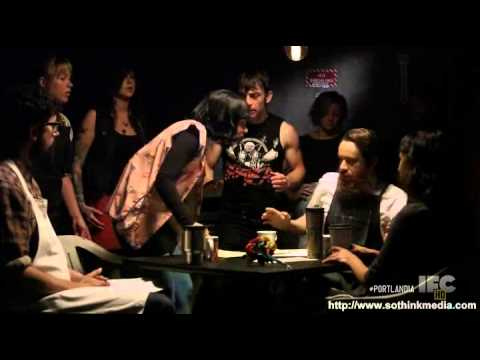

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
import re

def tokenize(text):
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.upper().split()
    
    return tokens

In [24]:
review_text = shops.full_review_text

review_text

0        11/25/2016 1 check-in Love love loved the atm...
1        12/2/2016 Listed in Date Night: Austin, Ambia...
2        11/30/2016 1 check-in Listed in Brunch Spots ...
3        11/25/2016 Very cool decor! Good drinks Nice ...
4        12/3/2016 1 check-in They are located within ...
5        11/20/2016 1 check-in Very cute cafe! I think...
6        10/27/2016 2 check-ins Listed in "Nuptial Cof...
7        11/2/2016 2 check-ins Love this place!  5 sta...
8        10/25/2016 1 check-in Ok, let's try this appr...
9        11/10/2016 3 check-ins This place has been sh...
10       10/22/2016 1 check-in Listed in Americano Thi...
11       11/20/2016 The store has A+ decoration, but h...
12       11/17/2016 1 check-in Listed in 2016 - The Th...
13       12/5/2016 This is such a cute little cafe! I'...
14       11/13/2016 Beautiful eccentric coffee shop wi...
15       11/9/2016 1 check-in Listed in In Search of F...
16       11/6/2016 Really love the atmosphere here! I ...
17       10/25

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [12]:
import spacy
from spacy.tokenizer import Tokenizer


nlp = spacy.load("en_core_web_lg")

tokenizer = Tokenizer(nlp.vocab)

In [21]:
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [30]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [31]:
shops.tokens.head()

0    [11252016, 1, CHECKIN, LOVE, LOVE, LOVED, THE,...
1    [1222016, LISTED, IN, DATE, NIGHT, AUSTIN, AMB...
2    [11302016, 1, CHECKIN, LISTED, IN, BRUNCH, SPO...
3    [11252016, VERY, COOL, DECOR, GOOD, DRINKS, NI...
4    [1232016, 1, CHECKIN, THEY, ARE, LOCATED, WITH...
Name: full_review_text, dtype: object

In [93]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [124]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee','I', 'shop', 'i', 'it', "it's", ' ', 'the', 'this',])

In [125]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['test'] = tokens

In [126]:
count(shops.test)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,place,3029,4264,1.0,0.010916,0.010916,0.397715
110,great,2438,3250,2.0,0.008320,0.019236,0.320116
186,like,2034,2902,3.0,0.007429,0.026665,0.267069
179,good,2084,2779,4.0,0.007114,0.033779,0.273634
41,1,1998,2035,5.0,0.005210,0.038989,0.262342
29,check-in,1957,1961,6.0,0.005020,0.044009,0.256959
37,love,1434,1806,7.0,0.004623,0.048632,0.188288
304,i'm,1382,1797,8.0,0.004600,0.053233,0.181460
95,-,919,1773,9.0,0.004539,0.057772,0.120667
385,i've,1164,1479,10.0,0.003786,0.061558,0.152836


In [127]:
wordcount.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
24,THE,6847,34809,1.0,0.044537,0.044537,0.899028
58,AND,6864,26650,2.0,0.034098,0.078634,0.901261
49,A,6246,22755,3.0,0.029114,0.107748,0.820116
10,I,5528,20237,4.0,0.025892,0.133641,0.725840
31,TO,5653,17164,5.0,0.021961,0.155601,0.742253


In [128]:
shops2 = shops.copy()

In [129]:
shops2['star_rating'] = shops['star_rating'].str.replace(' star rating', '').astype(float)

In [130]:
good_review_count = count(shops2['test'][shops2['star_rating'] >= 4.0])
good_review_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,place,2432,3389,1.0,0.011142,0.011142,0.396091
110,great,2174,2902,2.0,0.009541,0.020684,0.354072
274,good,1643,2180,3.0,0.007167,0.027851,0.267590
243,like,1486,2068,4.0,0.006799,0.034650,0.242020
41,1,1621,1649,5.0,0.005422,0.040072,0.264007
37,love,1263,1604,6.0,0.005274,0.045345,0.205700
29,check-in,1598,1602,7.0,0.005267,0.050612,0.260261
95,-,727,1431,8.0,0.004705,0.055317,0.118404
276,i'm,1077,1375,9.0,0.004521,0.059838,0.175407
619,little,1027,1230,10.0,0.004044,0.063882,0.167264


In [123]:
bad_review_count = count(shops2['test'][shops2['star_rating'] < 4.0])
bad_review_count

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,,1476,4840,1.0,0.053006,0.053006,1.000000
178,place,597,875,2.0,0.009583,0.062589,0.404472
28,like,548,834,3.0,0.009134,0.071723,0.371274
19,good,441,599,4.0,0.006560,0.078283,0.298780
218,don't,340,430,5.0,0.004709,0.082992,0.230352
72,i'm,305,422,6.0,0.004622,0.087614,0.206640
82,1,377,386,7.0,0.004227,0.091841,0.255420
76,food,266,369,8.0,0.004041,0.095882,0.180217
62,check-in,359,359,9.0,0.003932,0.099814,0.243225
249,time,264,351,10.0,0.003844,0.103658,0.178862


## Can we visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

